In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Q6. Calculate and compare the mean, median, and mode of math score.

##### Does the data appear skewed? Why?

In [74]:
math_mean = df['math score'].mean()
print(math_mean)
math_median = df['math score'].median()
print(math_median)
math_mode = df['math score'].mode()
print(math_mode)

66.089
66.0
0    65
Name: math score, dtype: int64


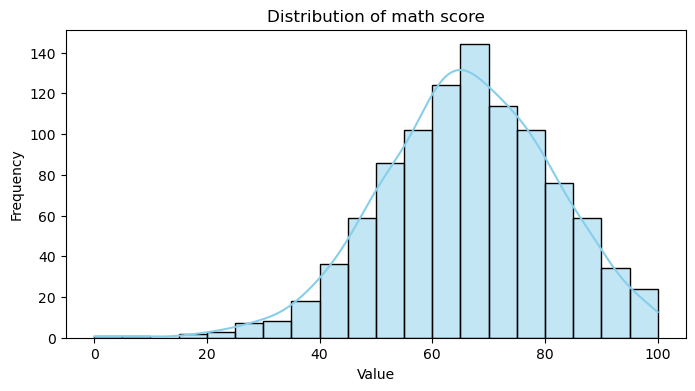

In [75]:
plt.figure(figsize = (8, 4))
sns.histplot(df['math score'], bins = 20, kde = True, color = 'skyblue')
plt.title('Distribution of math score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

* The distribution is approximately normal, centered around 65–70.
* There's a slight left skew, caused by a few students scoring very low (including 0).

## Q7. Construct a 95% confidence interval for the mean reading score.

In [78]:
import scipy.stats as stats

In [79]:
mean_reading = df['reading score'].mean()
sem_reading = stats.sem(df['reading score'])

In [80]:
confidence_level = 0.95
n = len(df['reading score'])
dof = n - 1

confidence_interval = stats.t.interval(confidence_level, dof, loc = mean_reading, scale = sem_reading)

# loc stands for "location parameter"
# scale is the Standard Error of the Mean (SEM)

print(f"Sample Mean: {mean_reading:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


Sample Mean: 69.17
95% Confidence Interval: (68.26, 70.08)


## Q8. Test if students who completed the test preparation course scored significantly higher in writing score using a two-sample t-test.

In [83]:
completed = df[df['test preparation course'] == 'completed']['writing score']
not_completed = df[df['test preparation course'] == 'none']['writing score']

print("(Null Hypothesis): There is no difference in writing scores between students who completed the test preparation course and those who did not.")
print("(Alternative Hypothesis): Students who completed the test preparation course scored differently (higher or lower) than those who did not.\n")


t_stat, p_val = stats.ttest_ind(completed, not_completed)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.2e}")

if p_val < 0.05:
    print("\n\nConclusion: Reject the null hypothesis. There is a statistically significant difference — students who completed the course scored higher.")
else:
    print("\n\nConclusion: Fail to reject the null hypothesis. No statistically significant difference found.")

(Null Hypothesis): There is no difference in writing scores between students who completed the test preparation course and those who did not.
(Alternative Hypothesis): Students who completed the test preparation course scored differently (higher or lower) than those who did not.

T-statistic: 10.41
P-value: 3.69e-24


Conclusion: Reject the null hypothesis. There is a statistically significant difference — students who completed the course scored higher.


## Q9. Use a Chi-Square test to determine if there is a significant relationship between gender and whether a student’s math score is above average (create binary column).

In [103]:
from scipy.stats import chi2_contingency

In [105]:
avg_math_score = df['math score'].mean()
df['above_avg_math_score'] = df['math score'] > avg_math_score

contingency_table = pd.crosstab(df['gender'], df['above_avg_math_score'])


chi2_stat, p_val, dof, expected =  chi2_contingency(contingency_table)

print("(Null Hypothesis): Gender and above-average math score are independent (no relationship).")
print("(Alternative Hypothesis): Gender and above-average math score are dependent (significantly related).\n")

print("Contingency Table:")
print(contingency_table, "\n")
print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_val:.5f}")


if p_val < 0.05:
    print("\nConclusion: Reject the null hypothesis. There is a significant relationship between gender and above-average math performance.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. No significant relationship found.")

(Null Hypothesis): Gender and above-average math score are independent (no relationship).
(Alternative Hypothesis): Gender and above-average math score are dependent (significantly related).

Contingency Table:
above_avg_math_score  False  True 
gender                            
female                  297    221
male                    210    272 

Chi-square Statistic: 18.39
Degrees of Freedom: 1
P-value: 0.00002

Conclusion: Reject the null hypothesis. There is a significant relationship between gender and above-average math performance.


## Q10. Perform a one-way ANOVA to test if math score varies significantly across different parental levels of education.

In [132]:
math_by_group = df.groupby('parental level of education')['math score'].apply(list)

anova_res = stats.f_oneway(*math_by_group)

print("(Null Hypothesis): The mean math scores are the same across all parental education groups.")
print("(Alternative Hypothesis): At least one group has a different mean math score.\n")


print(f"F-statistic: {anova_res.statistic:.2f}")
print(f"P-value: {anova_res.pvalue:.6f}")

if anova_res.pvalue < 0.05:
    print("\n Conclusion: Reject the null hypothesis. There is a significant difference in math scores based on parental education level.")
else:
    print("\n Conclusion: Fail to reject the null hypothesis. No significant difference found.")


(Null Hypothesis): The mean math scores are the same across all parental education groups.
(Alternative Hypothesis): At least one group has a different mean math score.

F-statistic: 6.52
P-value: 0.000006

 Conclusion: Reject the null hypothesis. There is a significant difference in math scores based on parental education level.
